In [1]:
#==================================================#==================================================#==================================================#======================================

#2)Costos en función de: Weight_kg|Distance_miles|Transit_Days


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Cargar datos
df = pd.read_csv('logistics_shipments_dataset.csv')

# Ver estructura
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                          --------------  ----- 
 0   Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB
None
Shipment_ID;Origin_Warehouse;Destination;Carrier;Shipment_Date;Delivery_Date;Weight_kg;Cost;Status;Distance_miles;Transit_Days    0
dtype: int64


In [3]:
# Cargar dataset con separador correcto (;)
df = pd.read_csv("logistics_shipments_dataset.csv", sep=";")

# Mostrar columnas para confirmar que ya están bien separadas
print("👉 Columnas después de separar:", df.columns.tolist())

# Ahora sí podés usar dropna sin errores
df = df.dropna(subset=['Cost', 'Weight_kg', 'Distance_miles', 'Transit_Days'])
print("✅ Filas válidas:", len(df))

👉 Columnas después de separar: ['Shipment_ID', 'Origin_Warehouse', 'Destination', 'Carrier', 'Shipment_Date', 'Delivery_Date', 'Weight_kg', 'Cost', 'Status', 'Distance_miles', 'Transit_Days']
✅ Filas válidas: 1959


In [4]:
# Variables independientes y dependiente
X1 = df[['Weight_kg', 'Distance_miles', 'Transit_Days']]
y1 = df['Cost']

# Dividir en train y test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [5]:
# Entrenar modelo
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predecir
y1_pred = model1.predict(X1_test)

# Métricas
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print("Modelo 1 - Predicción de Costo")
print(f"MSE: {mse1:.2f}")
print(f"R²: {r2_1:.2f}")

Modelo 1 - Predicción de Costo
MSE: 101554.59
R²: 0.09


Text(0.5, 1.0, 'Modelo 1: Costo')

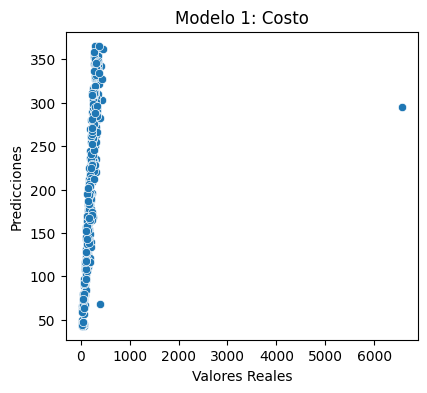

In [6]:
#Visualización de Resultados 
# Gráfico

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y1_test, y=y1_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Modelo 1: Costo")

In [7]:
#Interpretación de Coeficientes

coef1 = model1.coef_
intercept1 = model1.intercept_
print("Modelo 1 - Coeficientes:")
print(f"Intercepto: {intercept1:.2f}")
for i, col in enumerate(X1.columns):
    print(f"{col}: {coef1[i]:.2f}")

#==================================

#El diagrama de dispersión compara los valores reales de costo (eje X) con los valores predichos por el modelo (eje Y).
#.Si el modelo fuera perfecto, todos los puntos se ubicarían sobre la diagonal (la línea y = x).
#.Cuanto más cercanos estén los puntos a esa diagonal, mejor es la capacidad predictiva del modelo.
#.Una dispersión amplia o puntos alejados indican errores de predicción en ciertos casos, lo cual puede estar relacionado con la variabilidad de los datos o la necesidad de ajustar el modelo.

#-  Gráfico 2 – Costo en función de Weight_kg, Distance_miles y Transit_Days:   
#  Se observa que el  peso  y la  distancia  tienen un impacto directo en el costo del envío: a mayor peso y distancia, mayor costo. Los outliers reflejan envíos con costos inusuales (por ejemplo, cargas livianas pero con costos altos o cargas pesadas con tarifas atípicamente bajas).


Modelo 1 - Coeficientes:
Intercepto: 26.55
Weight_kg: 0.03
Distance_miles: 0.14
Transit_Days: 0.09
